In [59]:
import utilities as uts #general utilities that are useful for all methods
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("dvcs_bkm_xs_June2021_4pars.csv")
data = uts.DvcsData(df)

#Get real CFF values for Kinematic Sets Chosen
def getRealValues(sets, numPhi = 45):
    realValues = []
    for s in sets: 
        ReH, ReE, ReHtilde = df.loc[numPhi * s, 'gReH': 'gReHTilde']
        realValues.append([ReH, ReE, ReHtilde])

    return realValues

#Calculates mean and std of distribution from model
def calcMeanAndStd(data):
    return [[round(np.mean(data.ReH), 4), round(np.mean(data.ReE), 4), round(np.mean(data.ReHtilde), 4)], [round(np.std(data.ReH), 4), round(np.std(data.ReE), 4), round(np.std(data.ReHtilde), 4)]]

#Plots histogram with distribution and real values for a certain kinematic set
def plotHis(data, realValues, setNum, buckets = [10, 10, 10], sameAxes = True):
    plt.hist(data.ReHtilde, bins = buckets[2])
    plt.hist(data.ReE, bins = buckets[1])
    plt.hist(data.ReH, bins = buckets[0])

    plt.title(str(setNum) + " Distribution")
    plt.legend(["ReHtilde", "ReE", "ReH"])

    if sameAxes: 
        plt.xlim(xmin=-70, xmax = 20)    
    
    plt.axvline(x=realValues[0], ymin=0, ymax=500, color = '#1a601b')
    plt.axvline(x=realValues[1], ymin=0, ymax=500, color = '#7f3f07')
    plt.axvline(x=realValues[2], ymin=0, ymax=500, color = '#0c3049')

sets = [0]
realValues = getRealValues(sets, numPhi=45)

In [8]:
def getData(errValues):
    ReHSTD = []
    ReESTD = []
    ReHtildeSTD = []

    ReHMean = []
    ReEMean = []
    ReHtildeMean = []

    reals = getRealValues([0], numPhi = 36)

    for err in errValues: 
        data = pd.read_csv("Predictions\Method2-" + str(err) +  ".csv")
        ReHSTD.append(round(np.std(data.ReH), 4))
        ReESTD.append(round(np.std(data.ReE), 4))
        ReHtildeSTD.append(round(np.std(data.ReHtilde), 4))

        ReHMean.append(abs(round(reals[0][0] - np.mean(data.ReH), 4)))
        ReEMean.append(abs(round(reals[0][1] - np.mean(data.ReE), 4)))
        ReHtildeMean.append(abs(round(reals[0][2] - np.mean(data.ReHtilde), 4)))

    return ReHSTD, ReESTD, ReHtildeSTD, ReHMean, ReEMean, ReHtildeMean

In [48]:
errValues = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.35, 0.5]
ReHSTD, ReESTD, ReHtildeSTD, ReHMean, ReEMean, ReHtildeMean = getData(errValues)

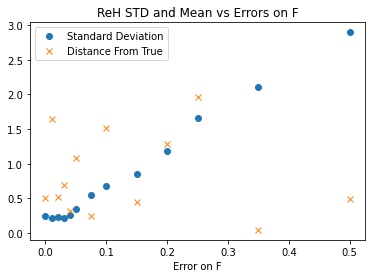

In [85]:
plt.plot(errValues, ReHSTD, 'o', label = 'Standard Deviation')
plt.plot(errValues, ReHMean, 'x', label = 'Distance From True')
plt.title("ReH STD and Mean vs Errors on F")
plt.xlabel("Error on F")
plt.legend()

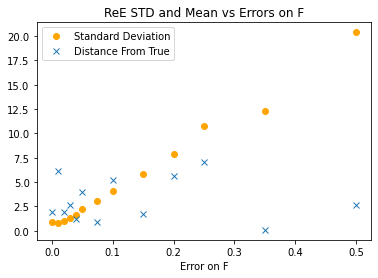

In [86]:
plt.plot(errValues, ReESTD, 'o', color = 'orange' ,label = 'Standard Deviation')
plt.plot(errValues, ReEMean, 'x', label = 'Distance From True')
plt.title("ReE STD and Mean vs Errors on F")
plt.xlabel("Error on F")
plt.legend()

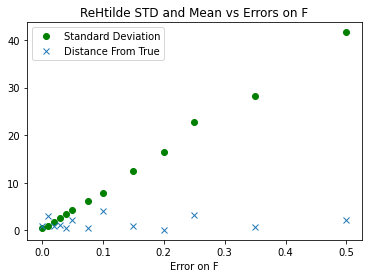

In [87]:
plt.plot(errValues, ReHtildeSTD, 'o', color = 'green', label = 'Standard Deviation')
plt.plot(errValues, ReHtildeMean, 'x', label = 'Distance From True')
plt.title("ReHtilde STD and Mean vs Errors on F")
plt.xlabel("Error on F")
plt.legend()

[2.09962, -2.91025, 5.5296]


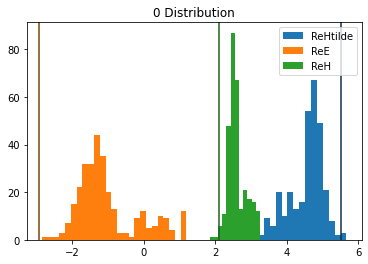

In [70]:
setNum = 0

_ = pd.read_csv("Predictions\Method2-" + str(0.0) +  ".csv")
print(realValues[setNum])
plotHis(_, realValues[setNum], setNum, [12, 25, 15], sameAxes=False)
mean005, std005 = calcMeanAndStd(_)

[2.09962, -2.91025, 5.5296]


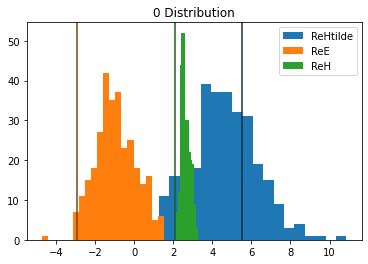

In [84]:
setNum = 0

_ = pd.read_csv("Predictions\Method2-" + str(0.02) +  ".csv")
print(realValues[setNum])
plotHis(_, realValues[setNum], setNum, [12, 20, 25], sameAxes=False)
mean005, std005 = calcMeanAndStd(_)

[2.09962, -2.91025, 5.5296]


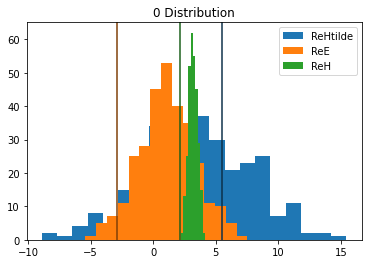

In [81]:
setNum = 0

_ = pd.read_csv("Predictions\Method2-" + str(0.05) +  ".csv")
print(realValues[setNum])
plotHis(_, realValues[setNum], setNum, [10, 15, 20], sameAxes=False)
mean005, std005 = calcMeanAndStd(_)

[2.09962, -2.91025, 5.5296]


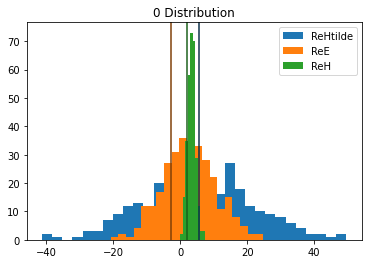

In [79]:
_ = pd.read_csv("Predictions\Method2-" + str(0.2) +  ".csv")
print(realValues[setNum])
plotHis(_, realValues[setNum], setNum, [10, 20, 30], sameAxes=False)
mean005, std005 = calcMeanAndStd(_)